In [1]:
#import required libraries & modules

import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [6]:
#load dataset for category

df = pd.read_csv('/home/masubhaat/recommender_project/data/amazon.csv')
df = df.dropna()
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [8]:
product_descriptions = pd.read_csv('/home/masubhaat/recommender_project/data/product_descriptions.csv')

In [9]:
product_descriptions.shape

(124428, 2)

In [10]:
product_descriptions = product_descriptions.dropna()

In [11]:
product_descriptions.shape

(124428, 2)

In [12]:
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [13]:
product_descriptions_1 = product_descriptions.head(650)

In [15]:
product_descriptions_1["product_description"].head(20)

0     Not only do angles make joints stronger, they ...
1     BEHR Premium Textured DECKOVER is an innovativ...
2     Classic architecture meets contemporary design...
3     The Grape Solar 265-Watt Polycrystalline PV So...
4     Update your bathroom with the Delta Vero Singl...
5     Achieving delicious results is almost effortle...
6     The Quantum Adjustable 2-Light LED Black Emerg...
7     The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8     Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9     Valley View Industries Metal Stakes (4-Pack) a...
10    Recycler 22 in. Personal Pace Variable Speed S...
11    The 96 in. wide Caramel Simple Weave Rollup Ba...
12    The InSinkErator SinkTop Switch Single Outlet ...
13    The Rubbermaid 1-Step Folding Plastic Step Sto...
14    Backyard X-Scapes, Inc. uses the finest bamboo...
15    Make grilling great with this handsome and fun...
16    The MD Building Products 36 in. x 36 in. x 1/5...
17    This classic plastic sprinkler head that f

In [1]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions_1["product_description"])
print(X1)

NameError: name 'TfidfVectorizer' is not defined

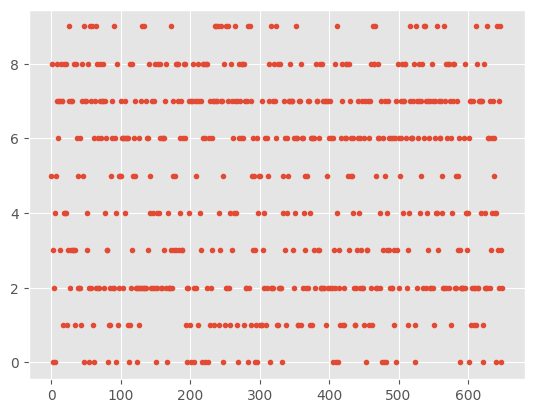

In [18]:
# Fitting K-Means to the dataset

X=X1
kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [21]:


def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print



In [25]:
# # Optimal clusters is 
true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print_cluster(i)


Top terms per cluster:
Cluster 0:
 metal
 screws
 screw
 hole
 bit
 drill
 azek
 fastening
 drive
 gauge
Cluster 1:
 door
 california
 proposition
 nbsp
 residents
 65
 wood
 ft
 painted
 primed
Cluster 2:
 light
 watt
 led
 fixture
 bulb
 bulbs
 lighting
 metal
 use
 fuses
Cluster 3:
 finish
 furniture
 paint
 cabinet
 soap
 make
 covers
 look
 available
 following
Cluster 4:
 patio
 pet
 frame
 resin
 steel
 weather
 rust
 wicker
 dog
 cushions
Cluster 5:
 wall
 piece
 tile
 stone
 color
 design
 residential
 installation
 home
 recommended
Cluster 6:
 paint
 roller
 ft
 brush
 insulation
 easy
 cover
 use
 smooth
 wood
Cluster 7:
 tool
 storage
 easy
 saw
 lbs
 blade
 capacity
 cutting
 shelves
 20
Cluster 8:
 water
 air
 heater
 easy
 ft
 control
 tank
 use
 provides
 high
Cluster 9:
 window
 rug
 bamboo
 mount
 size
 36
 natural
 fan
 shades
 cut


In [26]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [27]:
show_recommendations("cutting tool")

Cluster 7:
 tool
 storage
 easy
 saw
 lbs
 blade
 capacity
 cutting
 shelves
 20
